In [ ]:
import pandas as pd
import numpy as np


## Exploratory Data Analysis

In [202]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Air_Service,About,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time,Landing_time
0,IndiGo,No info,non-stop,2h 50m,3897,24/03/2019,Banglore,New Delhi,22:20,2020-03-22 01:10:00
1,Air India,No info,2 stops,7h 25m,7662,1/05/2019,Kolkata,Banglore,05:50,13:15
2,Jet Airways,No info,2 stops,19h,13882,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun
3,IndiGo,No info,1 stop,5h 25m,6218,12/05/2019,Kolkata,Banglore,18:05,23:30
4,IndiGo,No info,1 stop,4h 45m,13302,01/03/2019,Banglore,New Delhi,16:50,21:35


In [203]:
df.info

<bound method DataFrame.info of        Air_Service    About   Layover Time_span   Cost Flight_Date     Start  \
0           IndiGo  No info  non-stop    2h 50m   3897  24/03/2019  Banglore   
1        Air India  No info   2 stops    7h 25m   7662   1/05/2019   Kolkata   
2      Jet Airways  No info   2 stops       19h  13882   9/06/2019     Delhi   
3           IndiGo  No info    1 stop    5h 25m   6218  12/05/2019   Kolkata   
4           IndiGo  No info    1 stop    4h 45m  13302  01/03/2019  Banglore   
...            ...      ...       ...       ...    ...         ...       ...   
10678     Air Asia  No info  non-stop    2h 30m   4107   9/04/2019   Kolkata   
10679    Air India  No info  non-stop    2h 35m   4145  27/04/2019   Kolkata   
10680  Jet Airways  No info  non-stop        3h   7229  27/04/2019  Banglore   
10681      Vistara  No info  non-stop    2h 40m  12648  01/03/2019  Banglore   
10682    Air India  No info   2 stops    8h 20m  11753   9/05/2019     Delhi   

       

In [204]:
df.describe()

,Cost
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [205]:
df.isnull()


,Air_Service,About,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time,Landing_time
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False


In [206]:
import matplotlib.pyplot as plt

## Data Cleaning

In [215]:
del df['Landing_time']

KeyError: 'Landing_time'

In [216]:
del df['About']

In [217]:
df = df.rename(columns={'Flight Date': 'Flight_Date'})


In [218]:
df["Start"] = df["Start"].str.lower()
df["Stop"] = df["Stop"].str.lower()

# EDA

## Data Dimension

In [219]:
df.shape

(10683, 8)

## Check for missing/null values

In [220]:
df.isnull().sum()

Air_Service      0
Layover          0
Time_span        0
Cost             0
Flight_Date      0
Start            0
Stop             0
Take_off_time    0
dtype: int64

## Replace missing values with NA

In [221]:
df = df.fillna("NA")

## Check for missing/null values again

In [222]:
df.isnull().sum()

Air_Service      0
Layover          0
Time_span        0
Cost             0
Flight_Date      0
Start            0
Stop             0
Take_off_time    0
dtype: int64

In [223]:
df

,Air_Service,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time
0,IndiGo,non-stop,2h 50m,3897,24/03/2019,banglore,new delhi,22:20
1,Air India,2 stops,7h 25m,7662,1/05/2019,kolkata,banglore,05:50
2,Jet Airways,2 stops,19h,13882,9/06/2019,delhi,cochin,09:25
3,IndiGo,1 stop,5h 25m,6218,12/05/2019,kolkata,banglore,18:05
4,IndiGo,1 stop,4h 45m,13302,01/03/2019,banglore,new delhi,16:50
...,...,...,...,...,...,...,...,...
10678,Air Asia,non-stop,2h 30m,4107,9/04/2019,kolkata,banglore,19:55
10679,Air India,non-stop,2h 35m,4145,27/04/2019,kolkata,banglore,20:45
10680,Jet Airways,non-stop,3h,7229,27/04/2019,banglore,delhi,08:20
10681,Vistara,non-stop,2h 40m,12648,01/03/2019,banglore,new delhi,11:30


## Analysis of datatypes in each column

In [224]:
df.dtypes

Air_Service      object
Layover          object
Time_span        object
Cost              int64
Flight_Date      object
Start            object
Stop             object
Take_off_time    object
dtype: object

## Questions

#1.What is the departure city, arrival city and departure date

In [16]:
dep = input("Enter Departure Destination: ")
arr = input("Enter Arrival Destination: ")
date= input("Enter departure date in the dd/mm/yyyy format: ")

print("\n")
print("User Details:")
print("Departure", "Arrival", "Departure Date")
print(dep,"  ",arr," ",date)

Enter Departure Destination: delhi
Enter Arrival Destination: cochin
Enter departure date in the dd/mm/yyyy format: 9/06/2019


User Details:
Departure Arrival Departure Date
delhi    cochin   9/06/2019


In [226]:
dep=dep.lower()
arr=arr.lower()

df1=df[df.Flight_Date.isin([date])]
df2=df1[df1.Start.isin([dep])]
df3=df2[df2.Stop.isin([arr])]


In [247]:
df3['Layover'] = np.where((df3.Layover == "non-stop"),0,df3.Layover)
df3['Layover'] = np.where((df3.Layover == "1 stop"),1,df3.Layover)
df3['Layover'] = np.where((df3.Layover == "2 stops"),2,df3.Layover)
df3

,Air_Service,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time
8687,Vistara,0,190,6216,9/06/2019,delhi,cochin,14:40
1486,IndiGo,0,195,6015,9/06/2019,delhi,cochin,21:05
6152,Air India,0,180,6094,9/06/2019,delhi,cochin,14:10
3218,IndiGo,0,195,5601,9/06/2019,delhi,cochin,05:35
6414,Air India,0,185,8456,9/06/2019,delhi,cochin,18:05
...,...,...,...,...,...,...,...,...
8446,Jet Airways,2,29h 50m,13376,9/06/2019,delhi,cochin,06:45
1312,Jet Airways,2,29h 50m,13376,9/06/2019,delhi,cochin,06:45
7439,Air India,2,30h 20m,12436,9/06/2019,delhi,cochin,12:55
1346,Air India,2,37h 20m,10493,9/06/2019,delhi,cochin,05:55


#2. Which of them has the smallest time span? (Sort in ascending order and then print  5 shortest spans)

In [248]:
df3['sort'] = df['Time_span'].str.extract('(\d+)', expand=False).astype(int)
df3.sort_values('sort',inplace=True, ascending=True)
df3 = df3.drop('sort', axis=1)

ddf3=df3.iloc[0:5]

ddf3['Time_span'] = np.where((ddf3.Time_span == '3h'),180,ddf3.Time_span)
ddf3['Time_span'] = np.where((ddf3.Time_span == '3h 5m'),185,ddf3.Time_span)
ddf3['Time_span'] = np.where((ddf3.Time_span == '3h 10m'),190,ddf3.Time_span)
ddf3['Time_span'] = np.where((ddf3.Time_span == '3h 15m'),195,ddf3.Time_span)

ddf3=ddf3.sort_values(by='Time_span', ascending=1)




<ipython-input-248-20957dd1fbda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf3['Time_span'] = np.where((ddf3.Time_span == '3h'),180,ddf3.Time_span)
<ipython-input-248-20957dd1fbda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf3['Time_span'] = np.where((ddf3.Time_span == '3h 5m'),185,ddf3.Time_span)
<ipython-input-248-20957dd1fbda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [249]:
df4=df3.sort_values(by='Cost', ascending=1)

ddf4=df4.iloc[0:5]

ddf4['Time_span'] = np.where((ddf4.Time_span == '4h 35m'),275,ddf4.Time_span)
ddf4['Time_span'] = np.where((ddf4.Time_span == '4h 30m'),270,ddf4.Time_span)
ddf4['Time_span'] = np.where((ddf4.Time_span == '7h 40m'),460,ddf4.Time_span)
ddf4['Time_span'] = np.where((ddf4.Time_span == '9h'),540,ddf4.Time_span)

ddf4


<ipython-input-249-de2635cd0f4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf4['Time_span'] = np.where((ddf4.Time_span == '4h 35m'),275,ddf4.Time_span)
<ipython-input-249-de2635cd0f4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf4['Time_span'] = np.where((ddf4.Time_span == '4h 30m'),270,ddf4.Time_span)
<ipython-input-249-de2635cd0f4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Air_Service,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time
3360,IndiGo,1,275,5054,9/06/2019,delhi,cochin,07:35
6713,SpiceJet,1,270,5158,9/06/2019,delhi,cochin,08:45
8886,GoAir,1,460,5199,9/06/2019,delhi,cochin,05:55
9202,SpiceJet,1,270,5264,9/06/2019,delhi,cochin,08:45
5184,GoAir,1,540,5281,9/06/2019,delhi,cochin,10:35


##Test-Data Details

In [250]:
df5 = pd.concat([ddf3, ddf4])
df5.describe()



,Cost
count,10.000000
mean,5833.800000
std,1015.150104
min,5054.000000
25%,5215.250000
50%,5441.000000
75%,6074.250000
max,8456.000000


##Test Data Table

In [251]:
df5

,Air_Service,Layover,Time_span,Cost,Flight_Date,Start,Stop,Take_off_time
6152,Air India,0,180,6094,9/06/2019,delhi,cochin,14:10
6414,Air India,0,185,8456,9/06/2019,delhi,cochin,18:05
8687,Vistara,0,190,6216,9/06/2019,delhi,cochin,14:40
1486,IndiGo,0,195,6015,9/06/2019,delhi,cochin,21:05
3218,IndiGo,0,195,5601,9/06/2019,delhi,cochin,05:35
3360,IndiGo,1,275,5054,9/06/2019,delhi,cochin,07:35
6713,SpiceJet,1,270,5158,9/06/2019,delhi,cochin,08:45
8886,GoAir,1,460,5199,9/06/2019,delhi,cochin,05:55
9202,SpiceJet,1,270,5264,9/06/2019,delhi,cochin,08:45
5184,GoAir,1,540,5281,9/06/2019,delhi,cochin,10:35


In [ ]:
%matplotlib inline

##Line Charts/Histograms -frequency of values

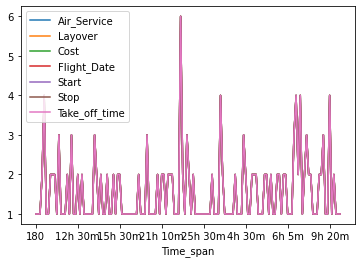

In [252]:
df3.groupby('Time_span').count().plot()


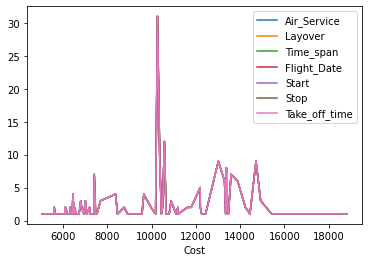

In [234]:
df3.groupby('Cost').count().plot()

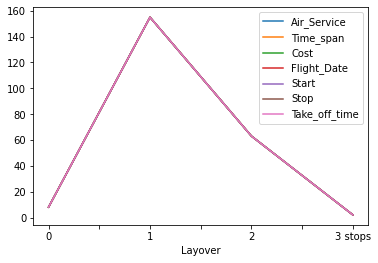

In [235]:
df3.groupby('Layover').count().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17EFB9E8>]],
      dtype=object)

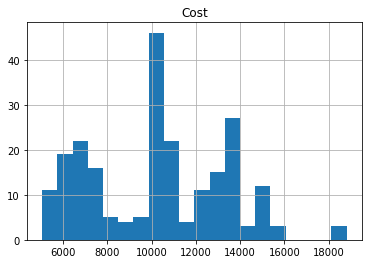

In [236]:
df3.hist(bins=20)

##Bar Charts/Histogramsfor Test Data - (Cost has all unique vaues)

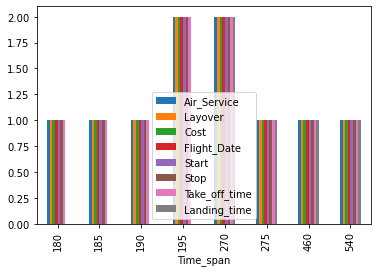

In [237]:
df5.groupby('Time_span').count().plot.bar()

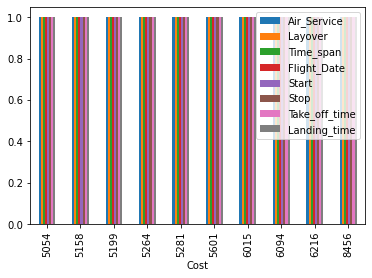

In [142]:
df5.groupby('Cost').count().plot.bar()

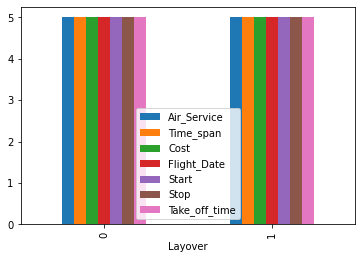

In [253]:
df5.groupby('Layover').count().plot.bar()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1803C0A0>]],
      dtype=object)

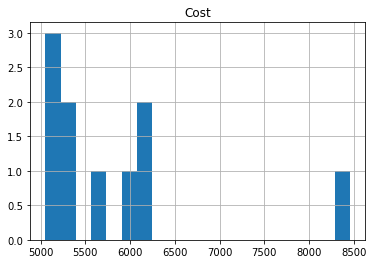

In [239]:
df5.hist(bins=20)


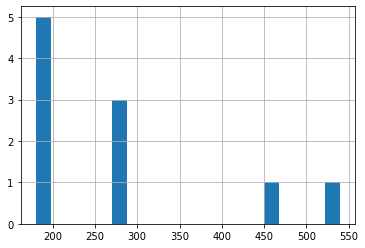

In [192]:
df5['Time_span'].hist(bins=20)

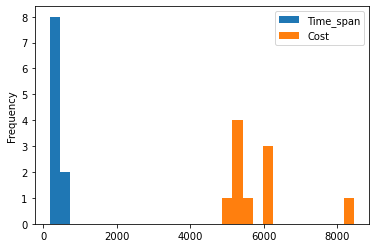

In [240]:
df5.plot.hist(bins=30)

## The test data can now be used for ML model

## Feasibility Forecast

In [ ]:
import seaborn as sns

##We can observe that cost and time span are inversely related, shorter the time, greater is the price(for the max/min case), there do exist a few options that are both of short duration and moderate price.

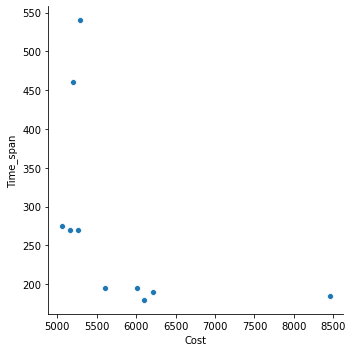

In [255]:
sns.relplot(x='Cost',y='Time_span',data=df5)

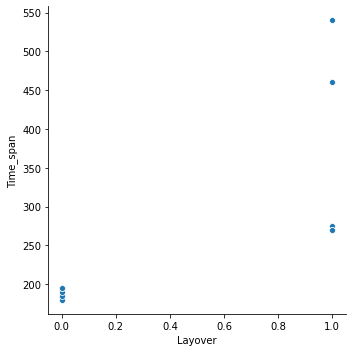

In [256]:
sns.relplot(x='Layover',y='Time_span',data=df5)

##We can see that the least time is taken when there is no layover and most when max layover.

##Let's see if layover affects the cost of the flight in any way

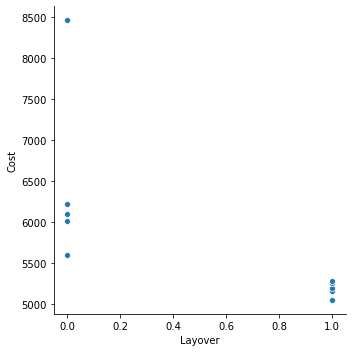

In [257]:
sns.relplot(x='Layover',y='Cost',data=df5)

##Flight cost also depends on departure time, let us verify

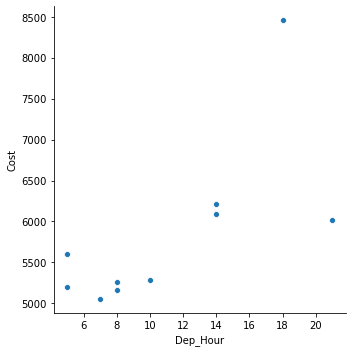

In [261]:
df5['Dep_Hour'] = df5['Take_off_time'].str.extract('(\d+)', expand=False).astype(int)
sns.relplot(x='Dep_Hour',y='Cost',data=df5)

##Flights in the morning tend to be cheaper than the ones in the evening

##All in all, we can see that morning flights with longer duration, more stops are cost-efficient

## Predictive Analysis

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [268]:
train=df5.drop(['Start','Stop','Take_off_time','Air_Service','Flight_Date'], axis=1)
test=df5['Cost']

In [293]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.7,random_state=2)

In [294]:
regr=LinearRegression()

In [295]:
regr.fit(X_train,y_train)

LinearRegression()

In [296]:
pred=regr.predict(X_test)

In [297]:
pred

array([5601., 8456., 5054., 6094., 5199., 6216., 6015.])

In [298]:
regr.score(X_test,y_test)

1.0

In [299]:
print(regr.intercept_)

9.094947017729282e-13


In [300]:
print(regr.coef_)

[-3.33066907e-16 -8.15102064e-17  1.00000000e+00 -1.29914348e-17]
